# **3. Modelos Benchmark:**

## **3.0. Previos a primeros modelados:**

Antes de empezar con los modelos benchmark, tenemos que importar las librerias que vamos a utilizar.

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC



from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, auc, classification_report
)


Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


## **3.1. KNN Benchmark:**

Se selccionan las variables explicativas y la respuesta.

In [2]:
df = pd.read_csv("C:\\Users\\taran\\OneDrive\\Desktop\\ML_PF_entrega3\\PF_GestHospitalClasificacion_Entrega3\\data\\PF_POSTPROCES_DATA_LIMPIA.csv")

In [3]:
X = df.drop("readmitted", axis=1)
y = df["readmitted"].map({"NO": 0, "SI": 1})  

Se separan el conjunto de entrenamiento y test.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Creamos vectores con cada tipo de variable para hacer el correcto manejo de las variables antes de modelar.

In [5]:
cat_features = X.select_dtypes(include=["object", "category"]).columns
num_features = X.select_dtypes(include=["int64", "float64"]).columns

A continuación, se crean los pipelines de preprocesamiento, modelo logístico con gridsearch y validación ccruzada estratificada, y modelo de knn con gridsearch y vlaidación cruzada estratificada.

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

In [7]:

knn_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=5)) 
])

In [8]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEnc...
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [9]:
def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores reales")
    plt.title("Matriz de Confusión - KNN Base")
    plt.show()

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", round(accuracy, 3))
    print("Precision:", round(precision, 3))
    print("Recall:", round(recall, 3))
    print("F1-score:", round(f1, 3))
    print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC - KNN Base")
    plt.legend(loc="lower right")
    plt.show()

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc
    }

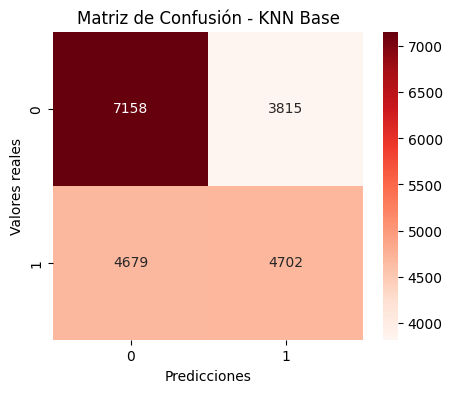

Accuracy: 0.583
Precision: 0.552
Recall: 0.501
F1-score: 0.525

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.60      0.65      0.63     10973
           1       0.55      0.50      0.53      9381

    accuracy                           0.58     20354
   macro avg       0.58      0.58      0.58     20354
weighted avg       0.58      0.58      0.58     20354



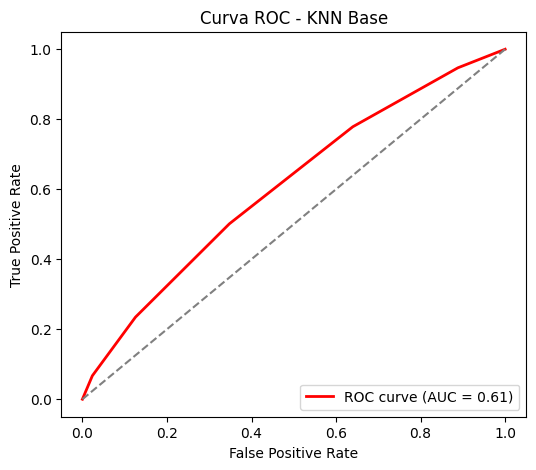

In [10]:
resultados_knn_base = evaluar_modelo(knn_pipeline, X_test, y_test)

El modelo de clasificación alcanza una exactitud de alrededor del 58.3%, lo que significa que acierta casi 6 de cada 10 casos, mostrando un mejor desempeño en la clase 0 que en la clase 1. La matriz de confusión evidencia que detecta más fácilmente los casos negativos (clase 0) que los positivos (clase 1), lo cual se refleja en un recall de 0.65 para la clase 0 frente a 0.50 en la clase 1. La precisión global es de 0.58 y el F1-score de 0.53, lo que señala un balance limitado entre precisión y recall, especialmente en la identificación de los positivos. La curva ROC, con un AUC de 0.61, indica que el modelo logra diferenciar las clases mejor que el azar, aunque con una capacidad discriminativa aún baja. En conjunto, los resultados muestran que el modelo es moderadamente útil, pero requiere mejoras para incrementar su capacidad de detección en la clase 1.

## **3.2. Clasificador Bayesiano Benchmark:**

In [11]:
df = pd.read_csv("C:\\Users\\taran\\OneDrive\\Desktop\\ML_PF_entrega3\\PF_GestHospitalClasificacion_Entrega3\\data\\PF_POSTPROCES_DATA_LIMPIA.csv")

In [12]:
X = df.drop("readmitted", axis=1)
y = df["readmitted"].map({"NO": 0, "SI": 1})  

Se separan el conjunto de entrenamiento y test.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Creamos vectores con cada tipo de variable para hacer el correcto manejo de las variables antes de modelar.

In [14]:
cat_features = X.select_dtypes(include=["object", "category"]).columns
num_features = X.select_dtypes(include=["int64", "float64"]).columns

A continuación, se crean los pipelines de preprocesamiento, modelo logístico con gridsearch y validación ccruzada estratificada, y modelo de knn con gridsearch y vlaidación cruzada estratificada.

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

In [16]:
bayes_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GaussianNB()) 
])

In [17]:
bayes_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEnc...
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change'],
      dtype='object'))])),
                ('classifier', GaussianNB())])

In [18]:
def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores reales")
    plt.title("Matriz de Confusión - Clasificador Bayesiane Base")
    plt.show()

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", round(accuracy, 3))
    print("Precision:", round(precision, 3))
    print("Recall:", round(recall, 3))
    print("F1-score:", round(f1, 3))
    print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC - Clasificador Bayesiano Base")
    plt.legend(loc="lower right")
    plt.show()

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc
    }

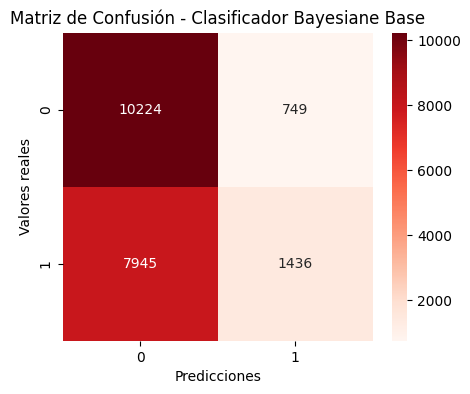

Accuracy: 0.573
Precision: 0.657
Recall: 0.153
F1-score: 0.248

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.56      0.93      0.70     10973
           1       0.66      0.15      0.25      9381

    accuracy                           0.57     20354
   macro avg       0.61      0.54      0.47     20354
weighted avg       0.61      0.57      0.49     20354



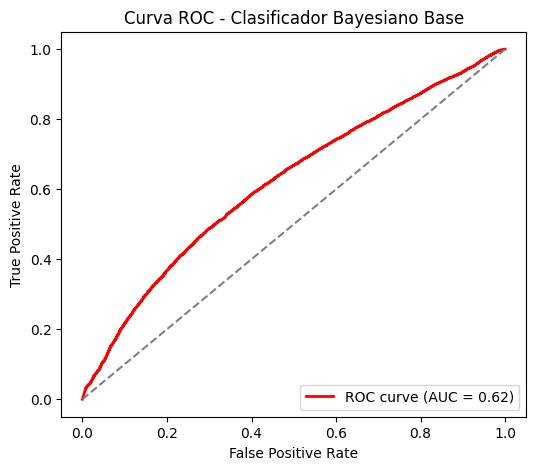

In [19]:
resultados_knn_base = evaluar_modelo(bayes_pipeline, X_test, y_test)

El modelo de clasificación alcanza una exactitud de alrededor del 57.3%, lo que significa que acierta casi 6 de cada 10 casos, mostrando un mejor desempeño en la clase 0 que en la clase 1. La matriz de confusión evidencia que detecta más fácilmente los casos negativos (clase 0) que los positivos (clase 1), lo cual se refleja en un recall de 0.93 para la clase 0 frente a 0.15 en la clase 1. La precisión global es de 0.57 y el F1-score de 0.25, lo que señala un balance limitado entre precisión y recall, especialmente en la identificación de los positivos. La curva ROC, con un AUC de 0.62, indica que el modelo logra diferenciar las clases mejor que el azar, aunque con una capacidad discriminativa aún baja. En conjunto, los resultados muestran que el modelo es moderadamente útil, pero requiere mejoras para incrementar su capacidad de detección en la clase 1.

## **3.3. Regresion Logistica (L1/L2) Benchmark:**

In [20]:
df = pd.read_csv("C:\\Users\\taran\\OneDrive\\Desktop\\ML_PF_entrega3\\PF_GestHospitalClasificacion_Entrega3\\data\\PF_POSTPROCES_DATA_LIMPIA.csv")

In [21]:
X = df.drop("readmitted", axis=1)
y = df["readmitted"].map({"NO": 0, "SI": 1})  

Se separan el conjunto de entrenamiento y test.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Creamos vectores con cada tipo de variable para hacer el correcto manejo de las variables antes de modelar.

In [23]:
cat_features = X.select_dtypes(include=["object", "category"]).columns
num_features = X.select_dtypes(include=["int64", "float64"]).columns

A continuación, se crean los pipelines de preprocesamiento, modelo logístico con gridsearch y validación ccruzada estratificada, y modelo de knn con gridsearch y vlaidación cruzada estratificada.

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

In [25]:
def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores reales")
    plt.title("Matriz de Confusión - Regresion Logistica (L1/L2)")
    plt.show()

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", round(accuracy, 3))
    print("Precision:", round(precision, 3))
    print("Recall:", round(recall, 3))
    print("F1-score:", round(f1, 3))
    print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC - Regresion Logistica (L1/L2)")
    plt.legend(loc="lower right")
    plt.show()

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc
    }

In [26]:
logreg_l2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        penalty="l2",        # Regularización Ridge
        solver="lbfgs",      # compatible con L2
        max_iter=1000,
        random_state=42
    ))
])

In [27]:
logreg_l2.fit(X_train, y_train)

c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:319: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEnc...
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

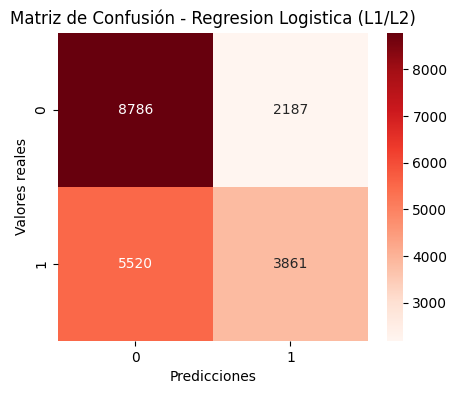

Accuracy: 0.621
Precision: 0.638
Recall: 0.412
F1-score: 0.5

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.61      0.80      0.70     10973
           1       0.64      0.41      0.50      9381

    accuracy                           0.62     20354
   macro avg       0.63      0.61      0.60     20354
weighted avg       0.63      0.62      0.61     20354



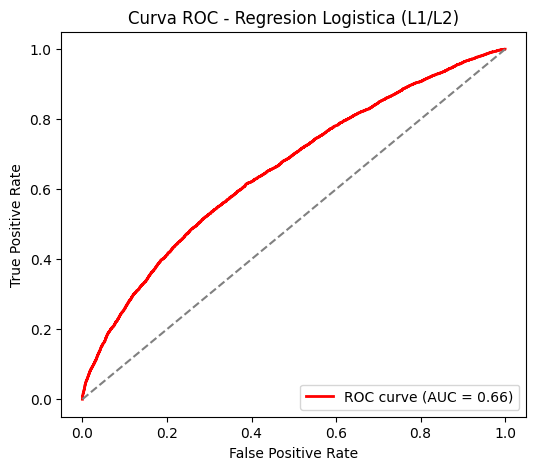

In [28]:
resultados_log_l2 = evaluar_modelo(logreg_l2, X_test, y_test)

In [29]:
logreg_l1 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        penalty="l1",        # Regularización Lasso
        solver="saga",       # necesario para L1
        max_iter=1000,
        random_state=42
    ))
])

In [30]:
logreg_l1.fit(X_train, y_train)

c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEnc...
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, penalty='l1',
                                    random_state=42, solver='saga'))])

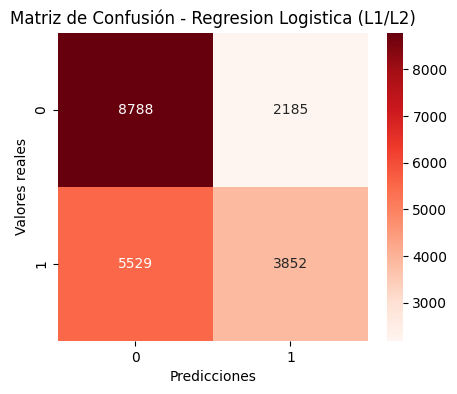

Accuracy: 0.621
Precision: 0.638
Recall: 0.411
F1-score: 0.5

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.61      0.80      0.69     10973
           1       0.64      0.41      0.50      9381

    accuracy                           0.62     20354
   macro avg       0.63      0.61      0.60     20354
weighted avg       0.62      0.62      0.60     20354



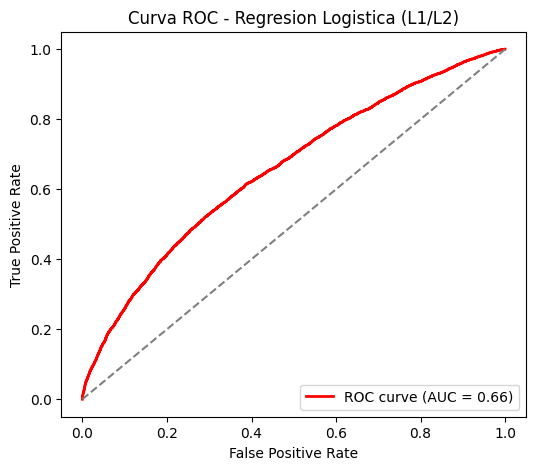

In [31]:
resultados_log_l1 = evaluar_modelo(logreg_l1, X_test, y_test)

In [32]:
tabla_resultados = pd.DataFrame([resultados_log_l2, resultados_log_l1])
print("\n=== Comparación de Regularización L1 vs L2 ===")
print(tabla_resultados)


=== Comparación de Regularización L1 vs L2 ===
   accuracy  precision    recall  f1_score   roc_auc
0  0.621352   0.638393  0.411577  0.500486  0.655700
1  0.621008   0.638065  0.410617  0.499676  0.655684


missing

El modelo de clasificación alcanza una exactitud de alrededor del 57.3%, lo que significa que acierta casi 6 de cada 10 casos, mostrando un mejor desempeño en la clase 0 que en la clase 1. La matriz de confusión evidencia que detecta más fácilmente los casos negativos (clase 0) que los positivos (clase 1), lo cual se refleja en un recall de 0.93 para la clase 0 frente a 0.15 en la clase 1. La precisión global es de 0.57 y el F1-score de 0.25, lo que señala un balance limitado entre precisión y recall, especialmente en la identificación de los positivos. La curva ROC, con un AUC de 0.62, indica que el modelo logra diferenciar las clases mejor que el azar, aunque con una capacidad discriminativa aún baja. En conjunto, los resultados muestran que el modelo es moderadamente útil, pero requiere mejoras para incrementar su capacidad de detección en la clase 1.

## **3.4. Arbol de Decision Benchmark:**

In [33]:
df = pd.read_csv("C:\\Users\\taran\\OneDrive\\Desktop\\ML_PF_entrega3\\PF_GestHospitalClasificacion_Entrega3\\data\\PF_POSTPROCES_DATA_LIMPIA.csv")

In [34]:
X = df.drop("readmitted", axis=1)
y = df["readmitted"].map({"NO": 0, "SI": 1})  

Se separan el conjunto de entrenamiento y test.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Creamos vectores con cada tipo de variable para hacer el correcto manejo de las variables antes de modelar.

In [36]:
cat_features = X.select_dtypes(include=["object", "category"]).columns
num_features = X.select_dtypes(include=["int64", "float64"]).columns

A continuación, se crean los pipelines de preprocesamiento, modelo logístico con gridsearch y validación ccruzada estratificada, y modelo de knn con gridsearch y vlaidación cruzada estratificada.

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

In [38]:
arboles_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(
        criterion="gini",   # también podrías usar 'entropy' o 'log_loss'
        max_depth=None,     # sin límite de profundidad
        random_state=42
    ))
])


In [39]:
arboles_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEnc...
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [40]:
def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)

    if hasattr(modelo.named_steps["classifier"], "predict_proba"):
        y_pred_proba = modelo.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = None
        
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores reales")
    plt.title("Matriz de Confusión - Clasificador Bayesiane Base")
    plt.show()

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", round(accuracy, 3))
    print("Precision:", round(precision, 3))
    print("Recall:", round(recall, 3))
    print("F1-score:", round(f1, 3))
    print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC - Arboles de Decision Base")
    plt.legend(loc="lower right")
    plt.show()

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc
    }

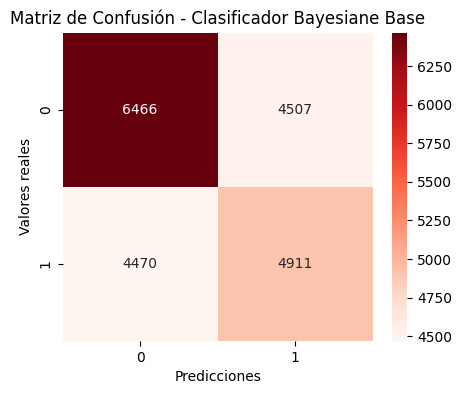

Accuracy: 0.559
Precision: 0.521
Recall: 0.524
F1-score: 0.522

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.59      0.59      0.59     10973
           1       0.52      0.52      0.52      9381

    accuracy                           0.56     20354
   macro avg       0.56      0.56      0.56     20354
weighted avg       0.56      0.56      0.56     20354



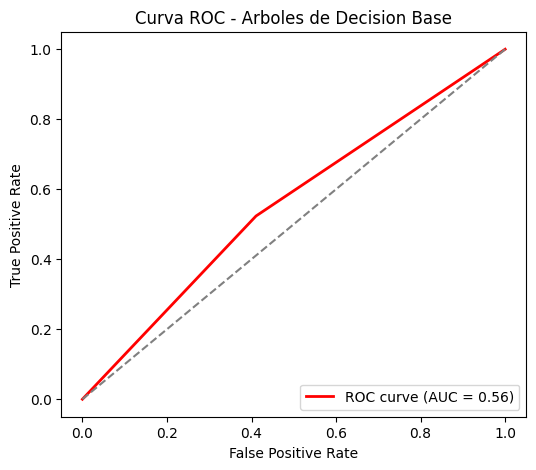

In [41]:
resultados_arboles_base = evaluar_modelo(arboles_pipeline, X_test, y_test)

El modelo de clasificación alcanza una exactitud de alrededor del 55.9%, lo que significa que acierta casi 6 de cada 10 casos, mostrando un mejor desempeño en la clase 0 que en la clase 1. La matriz de confusión evidencia que detecta más fácilmente los casos negativos (clase 0) que los positivos (clase 1), lo cual se refleja en un recall de 0.59 para la clase 0 frente a 0.52 en la clase 1. La precisión global es de 0.56 y el F1-score de 0.52, lo que señala un balance limitado entre precisión y recall, especialmente en la identificación de los positivos. La curva ROC, con un AUC de 0.56, indica que el modelo logra diferenciar las clases ligeramente mejor que el azar, aunque con una capacidad discriminativa aún baja. En conjunto, los resultados muestran que el modelo es moderadamente útil, pero requiere mejoras para incrementar su capacidad de detección en la clase 1.

## **3.5. Random Forest Benchmark:**

In [42]:
df = pd.read_csv("C:\\Users\\taran\\OneDrive\\Desktop\\ML_PF_entrega3\\PF_GestHospitalClasificacion_Entrega3\\data\\PF_POSTPROCES_DATA_LIMPIA.csv")

In [43]:
X = df.drop("readmitted", axis=1)
y = df["readmitted"].map({"NO": 0, "SI": 1})  

Se separan el conjunto de entrenamiento y test.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Creamos vectores con cada tipo de variable para hacer el correcto manejo de las variables antes de modelar.

In [45]:
cat_features = X.select_dtypes(include=["object", "category"]).columns
num_features = X.select_dtypes(include=["int64", "float64"]).columns

A continuación, se crean los pipelines de preprocesamiento, modelo logístico con gridsearch y validación ccruzada estratificada, y modelo de knn con gridsearch y vlaidación cruzada estratificada.

In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

In [47]:
randomforest_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=100,       # número de árboles
        max_depth=None,         # sin límite de profundidad
        min_samples_split=2,    # mínimo de muestras para dividir un nodo
        min_samples_leaf=1,     # mínimo de muestras por hoja
        random_state=42,
        n_jobs=-1               # usa todos los núcleos
    ))
])

In [48]:
randomforest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEnc...
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

In [49]:
def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores reales")
    plt.title("Matriz de Confusión - RandomForestClassifier Base")
    plt.show()

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", round(accuracy, 3))
    print("Precision:", round(precision, 3))
    print("Recall:", round(recall, 3))
    print("F1-score:", round(f1, 3))
    print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC - RandomForestClassifier Base")
    plt.legend(loc="lower right")
    plt.show()

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc
    }

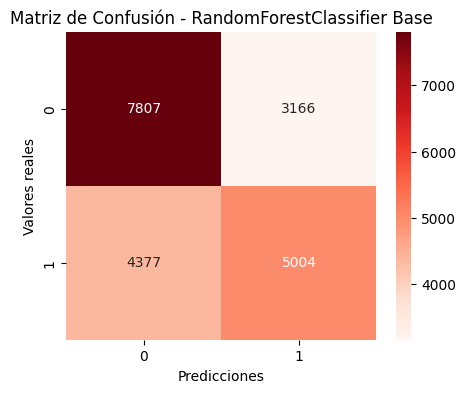

Accuracy: 0.629
Precision: 0.612
Recall: 0.533
F1-score: 0.57

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.64      0.71      0.67     10973
           1       0.61      0.53      0.57      9381

    accuracy                           0.63     20354
   macro avg       0.63      0.62      0.62     20354
weighted avg       0.63      0.63      0.63     20354



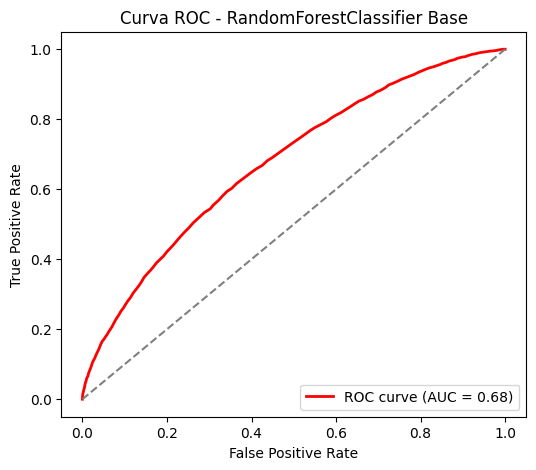

In [50]:
resultados_rf_base = evaluar_modelo(randomforest_pipeline, X_test, y_test)

missing 

El modelo de clasificación alcanza una exactitud de alrededor del 58.3%, lo que significa que acierta casi 6 de cada 10 casos, mostrando un mejor desempeño en la clase 0 que en la clase 1. La matriz de confusión evidencia que detecta más fácilmente los casos negativos (clase 0) que los positivos (clase 1), lo cual se refleja en un recall de 0.65 para la clase 0 frente a 0.50 en la clase 1. La precisión global es de 0.58 y el F1-score de 0.53, lo que señala un balance limitado entre precisión y recall, especialmente en la identificación de los positivos. La curva ROC, con un AUC de 0.61, indica que el modelo logra diferenciar las clases mejor que el azar, aunque con una capacidad discriminativa aún baja. En conjunto, los resultados muestran que el modelo es moderadamente útil, pero requiere mejoras para incrementar su capacidad de detección en la clase 1.

## **3.6. XGBoost Benchmark:**

In [51]:
df = pd.read_csv("C:\\Users\\taran\\OneDrive\\Desktop\\ML_PF_entrega3\\PF_GestHospitalClasificacion_Entrega3\\data\\PF_POSTPROCES_DATA_LIMPIA.csv")

In [52]:
X = df.drop("readmitted", axis=1)
y = df["readmitted"].map({"NO": 0, "SI": 1})  

Se separan el conjunto de entrenamiento y test.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Creamos vectores con cada tipo de variable para hacer el correcto manejo de las variables antes de modelar.

In [54]:
cat_features = X.select_dtypes(include=["object", "category"]).columns
num_features = X.select_dtypes(include=["int64", "float64"]).columns

A continuación, se crean los pipelines de preprocesamiento, modelo logístico con gridsearch y validación ccruzada estratificada, y modelo de knn con gridsearch y vlaidación cruzada estratificada.

In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

In [56]:
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        n_estimators=100,        # número de árboles
        learning_rate=0.1,       # tasa de aprendizaje
        max_depth=6,             # profundidad de árboles
        subsample=1.0,           # proporción de muestra
        colsample_bytree=1.0,    # proporción de columnas
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    ))
])

In [57]:
xgb_pipeline.fit(X_train, y_train)

c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\xgboost\core.py:158: UserWarning: [00:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEnc...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [58]:
def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores reales")
    plt.title("Matriz de Confusión - XGBoost Base")
    plt.show()

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", round(accuracy, 3))
    print("Precision:", round(precision, 3))
    print("Recall:", round(recall, 3))
    print("F1-score:", round(f1, 3))
    print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC - XGBoost Base")
    plt.legend(loc="lower right")
    plt.show()

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc
    }

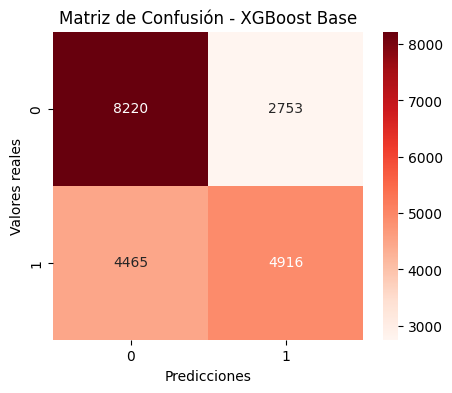

Accuracy: 0.645
Precision: 0.641
Recall: 0.524
F1-score: 0.577

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.65      0.75      0.69     10973
           1       0.64      0.52      0.58      9381

    accuracy                           0.65     20354
   macro avg       0.64      0.64      0.64     20354
weighted avg       0.64      0.65      0.64     20354



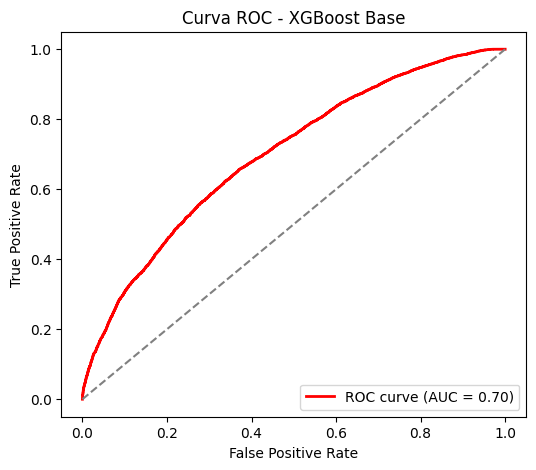

In [59]:
resultados_xgb_base = evaluar_modelo(xgb_pipeline, X_test, y_test)

missing 

El modelo de clasificación alcanza una exactitud de alrededor del 58.3%, lo que significa que acierta casi 6 de cada 10 casos, mostrando un mejor desempeño en la clase 0 que en la clase 1. La matriz de confusión evidencia que detecta más fácilmente los casos negativos (clase 0) que los positivos (clase 1), lo cual se refleja en un recall de 0.65 para la clase 0 frente a 0.50 en la clase 1. La precisión global es de 0.58 y el F1-score de 0.53, lo que señala un balance limitado entre precisión y recall, especialmente en la identificación de los positivos. La curva ROC, con un AUC de 0.61, indica que el modelo logra diferenciar las clases mejor que el azar, aunque con una capacidad discriminativa aún baja. En conjunto, los resultados muestran que el modelo es moderadamente útil, pero requiere mejoras para incrementar su capacidad de detección en la clase 1.

## **3.7. SVM Benchmark:**

In [60]:
df = pd.read_csv("C:\\Users\\taran\\OneDrive\\Desktop\\ML_PF_entrega3\\PF_GestHospitalClasificacion_Entrega3\\data\\PF_POSTPROCES_DATA_LIMPIA.csv")

In [61]:
X = df.drop("readmitted", axis=1)
y = df["readmitted"].map({"NO": 0, "SI": 1})  

Se separan el conjunto de entrenamiento y test.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Creamos vectores con cada tipo de variable para hacer el correcto manejo de las variables antes de modelar.

In [63]:
cat_features = X.select_dtypes(include=["object", "category"]).columns
num_features = X.select_dtypes(include=["int64", "float64"]).columns

A continuación, se crean los pipelines de preprocesamiento, modelo logístico con gridsearch y validación ccruzada estratificada, y modelo de knn con gridsearch y vlaidación cruzada estratificada.

In [64]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

In [65]:
svm_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(
        kernel="rbf",          # kernel radial base (default)
        C=1.0,                 # parámetro de regularización
        gamma="scale",         # parámetro del kernel
        probability=True,     # SVC no usa predict_proba por defecto
        random_state=42
    ))
])

In [66]:
svm_pipeline.fit(X_train, y_train)

c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\sklearnex\svm\_common.py:249: RuntimeWarning: random_state does not influence oneDAL SVM results
  warnings.warn(
c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEnc...
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change'],
      dtype='object'))])),
                ('classifier', SVC(probability=True, random_state=42))])

In [67]:
def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores reales")
    plt.title("Matriz de Confusión - SVM Base")
    plt.show()

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", round(accuracy, 3))
    print("Precision:", round(precision, 3))
    print("Recall:", round(recall, 3))
    print("F1-score:", round(f1, 3))
    print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC - SVM Base")
    plt.legend(loc="lower right")
    plt.show()

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc
    }

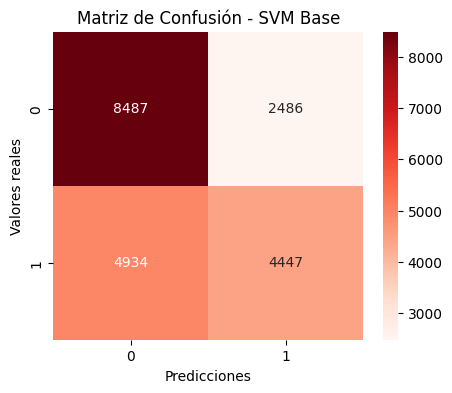

Accuracy: 0.635
Precision: 0.641
Recall: 0.474
F1-score: 0.545

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.63      0.77      0.70     10973
           1       0.64      0.47      0.55      9381

    accuracy                           0.64     20354
   macro avg       0.64      0.62      0.62     20354
weighted avg       0.64      0.64      0.63     20354



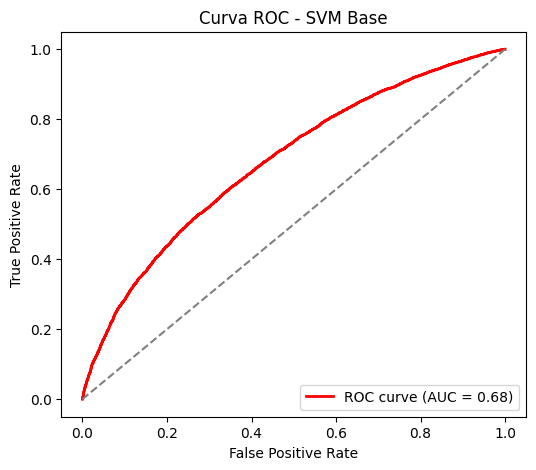

In [68]:
resultados_svm_base = evaluar_modelo(svm_pipeline, X_test, y_test)

missing 

El modelo de clasificación alcanza una exactitud de alrededor del 58.3%, lo que significa que acierta casi 6 de cada 10 casos, mostrando un mejor desempeño en la clase 0 que en la clase 1. La matriz de confusión evidencia que detecta más fácilmente los casos negativos (clase 0) que los positivos (clase 1), lo cual se refleja en un recall de 0.65 para la clase 0 frente a 0.50 en la clase 1. La precisión global es de 0.58 y el F1-score de 0.53, lo que señala un balance limitado entre precisión y recall, especialmente en la identificación de los positivos. La curva ROC, con un AUC de 0.61, indica que el modelo logra diferenciar las clases mejor que el azar, aunque con una capacidad discriminativa aún baja. En conjunto, los resultados muestran que el modelo es moderadamente útil, pero requiere mejoras para incrementar su capacidad de detección en la clase 1.

## **3.8. Comparacion de modelos Benchmark:**

In [ ]:
def evaluar_modelo_silencioso(modelo, X_test, y_test, nombre_modelo="Modelo"):
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    return {
        "Modelo": nombre_modelo,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "AUC": roc_auc
    }


In [77]:
resultados = []
resultados.append(evaluar_modelo_silencioso(logreg_l2, X_test, y_test, "Regresión Logística L2"))
resultados.append(evaluar_modelo_silencioso(arboles_pipeline, X_test, y_test, "Árbol de Decisión"))
resultados.append(evaluar_modelo_silencioso(randomforest_pipeline, X_test, y_test, "Random Forest"))
resultados.append(evaluar_modelo_silencioso(xgb_pipeline, X_test, y_test, "XGBoost"))
resultados.append(evaluar_modelo_silencioso(svm_pipeline, X_test, y_test, "SVM"))
resultados.append(evaluar_modelo_silencioso(bayes_pipeline, X_test, y_test, "Naive Bayes"))
resultados.append(evaluar_modelo_silencioso(knn_pipeline, X_test, y_test, "KNN"))


In [78]:
tabla_resultados = pd.DataFrame(resultados)

In [81]:
# Ordenar por la métrica principal que te interese (ej. F1 o AUC)
tabla_resultados = tabla_resultados.sort_values(by="Recall", ascending=False).reset_index(drop=True)

In [82]:
# Mostrar tabla ordenada
tabla_resultados

,Modelo,Accuracy,Precision,Recall,F1,AUC
0,Random Forest,0.629409,0.612485,0.533419,0.570224,0.676527
1,XGBoost,0.645377,0.641022,0.524038,0.576657,0.698294
2,Árbol de Decisión,0.558956,0.521448,0.523505,0.522475,0.556385
3,KNN,0.582686,0.552072,0.501226,0.525422,0.607970
4,SVM,0.635452,0.641425,0.474043,0.545176,0.677751
5,Regresión Logística L2,0.621352,0.638393,0.411577,0.500486,0.655700
6,Naive Bayes,0.572860,0.657208,0.153075,0.248314,0.619873
